In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset_med.csv')
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [3]:
df.shape


(890000, 17)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [5]:
df.isnull().sum()


id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [6]:
df.survived.value_counts()

survived
0    693996
1    196004
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= df.drop(columns=['id','diagnosis_date','end_treatment_date'],axis=1)

In [9]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62.0,Female,Cyprus,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48.0,Female,Estonia,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67.0,Female,Slovakia,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0


In [10]:
df_encoded = pd.get_dummies(df, columns=['gender','country','cancer_stage','family_history','smoking_status','treatment_type'], drop_first=True)


In [11]:
df_encoded

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,29.4,199,0,0,1,0,0,True,False,...,False,False,False,True,False,False,True,False,False,False
1,50.0,41.2,280,1,1,0,0,1,False,False,...,False,True,False,True,False,False,True,False,False,True
2,65.0,44.0,268,1,1,0,0,0,False,False,...,False,True,False,True,True,False,False,True,False,False
3,51.0,43.0,241,1,1,0,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
4,37.0,19.7,178,0,0,0,0,0,True,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,44.8,243,1,1,1,0,0,True,False,...,False,False,True,False,False,False,True,False,True,False
889996,62.0,21.6,240,0,0,0,0,0,False,False,...,True,False,False,True,True,False,False,False,False,True
889997,48.0,38.6,242,1,0,0,0,1,False,False,...,False,True,False,True,False,True,False,True,False,False
889998,67.0,18.6,194,1,1,0,0,0,False,False,...,False,False,True,True,True,False,False,False,False,False


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            890000 non-null  float64
 1   bmi                            890000 non-null  float64
 2   cholesterol_level              890000 non-null  int64  
 3   hypertension                   890000 non-null  int64  
 4   asthma                         890000 non-null  int64  
 5   cirrhosis                      890000 non-null  int64  
 6   other_cancer                   890000 non-null  int64  
 7   survived                       890000 non-null  int64  
 8   gender_Male                    890000 non-null  bool   
 9   country_Belgium                890000 non-null  bool   
 10  country_Bulgaria               890000 non-null  bool   
 11  country_Croatia                890000 non-null  bool   
 12  country_Cyprus                

<Axes: >

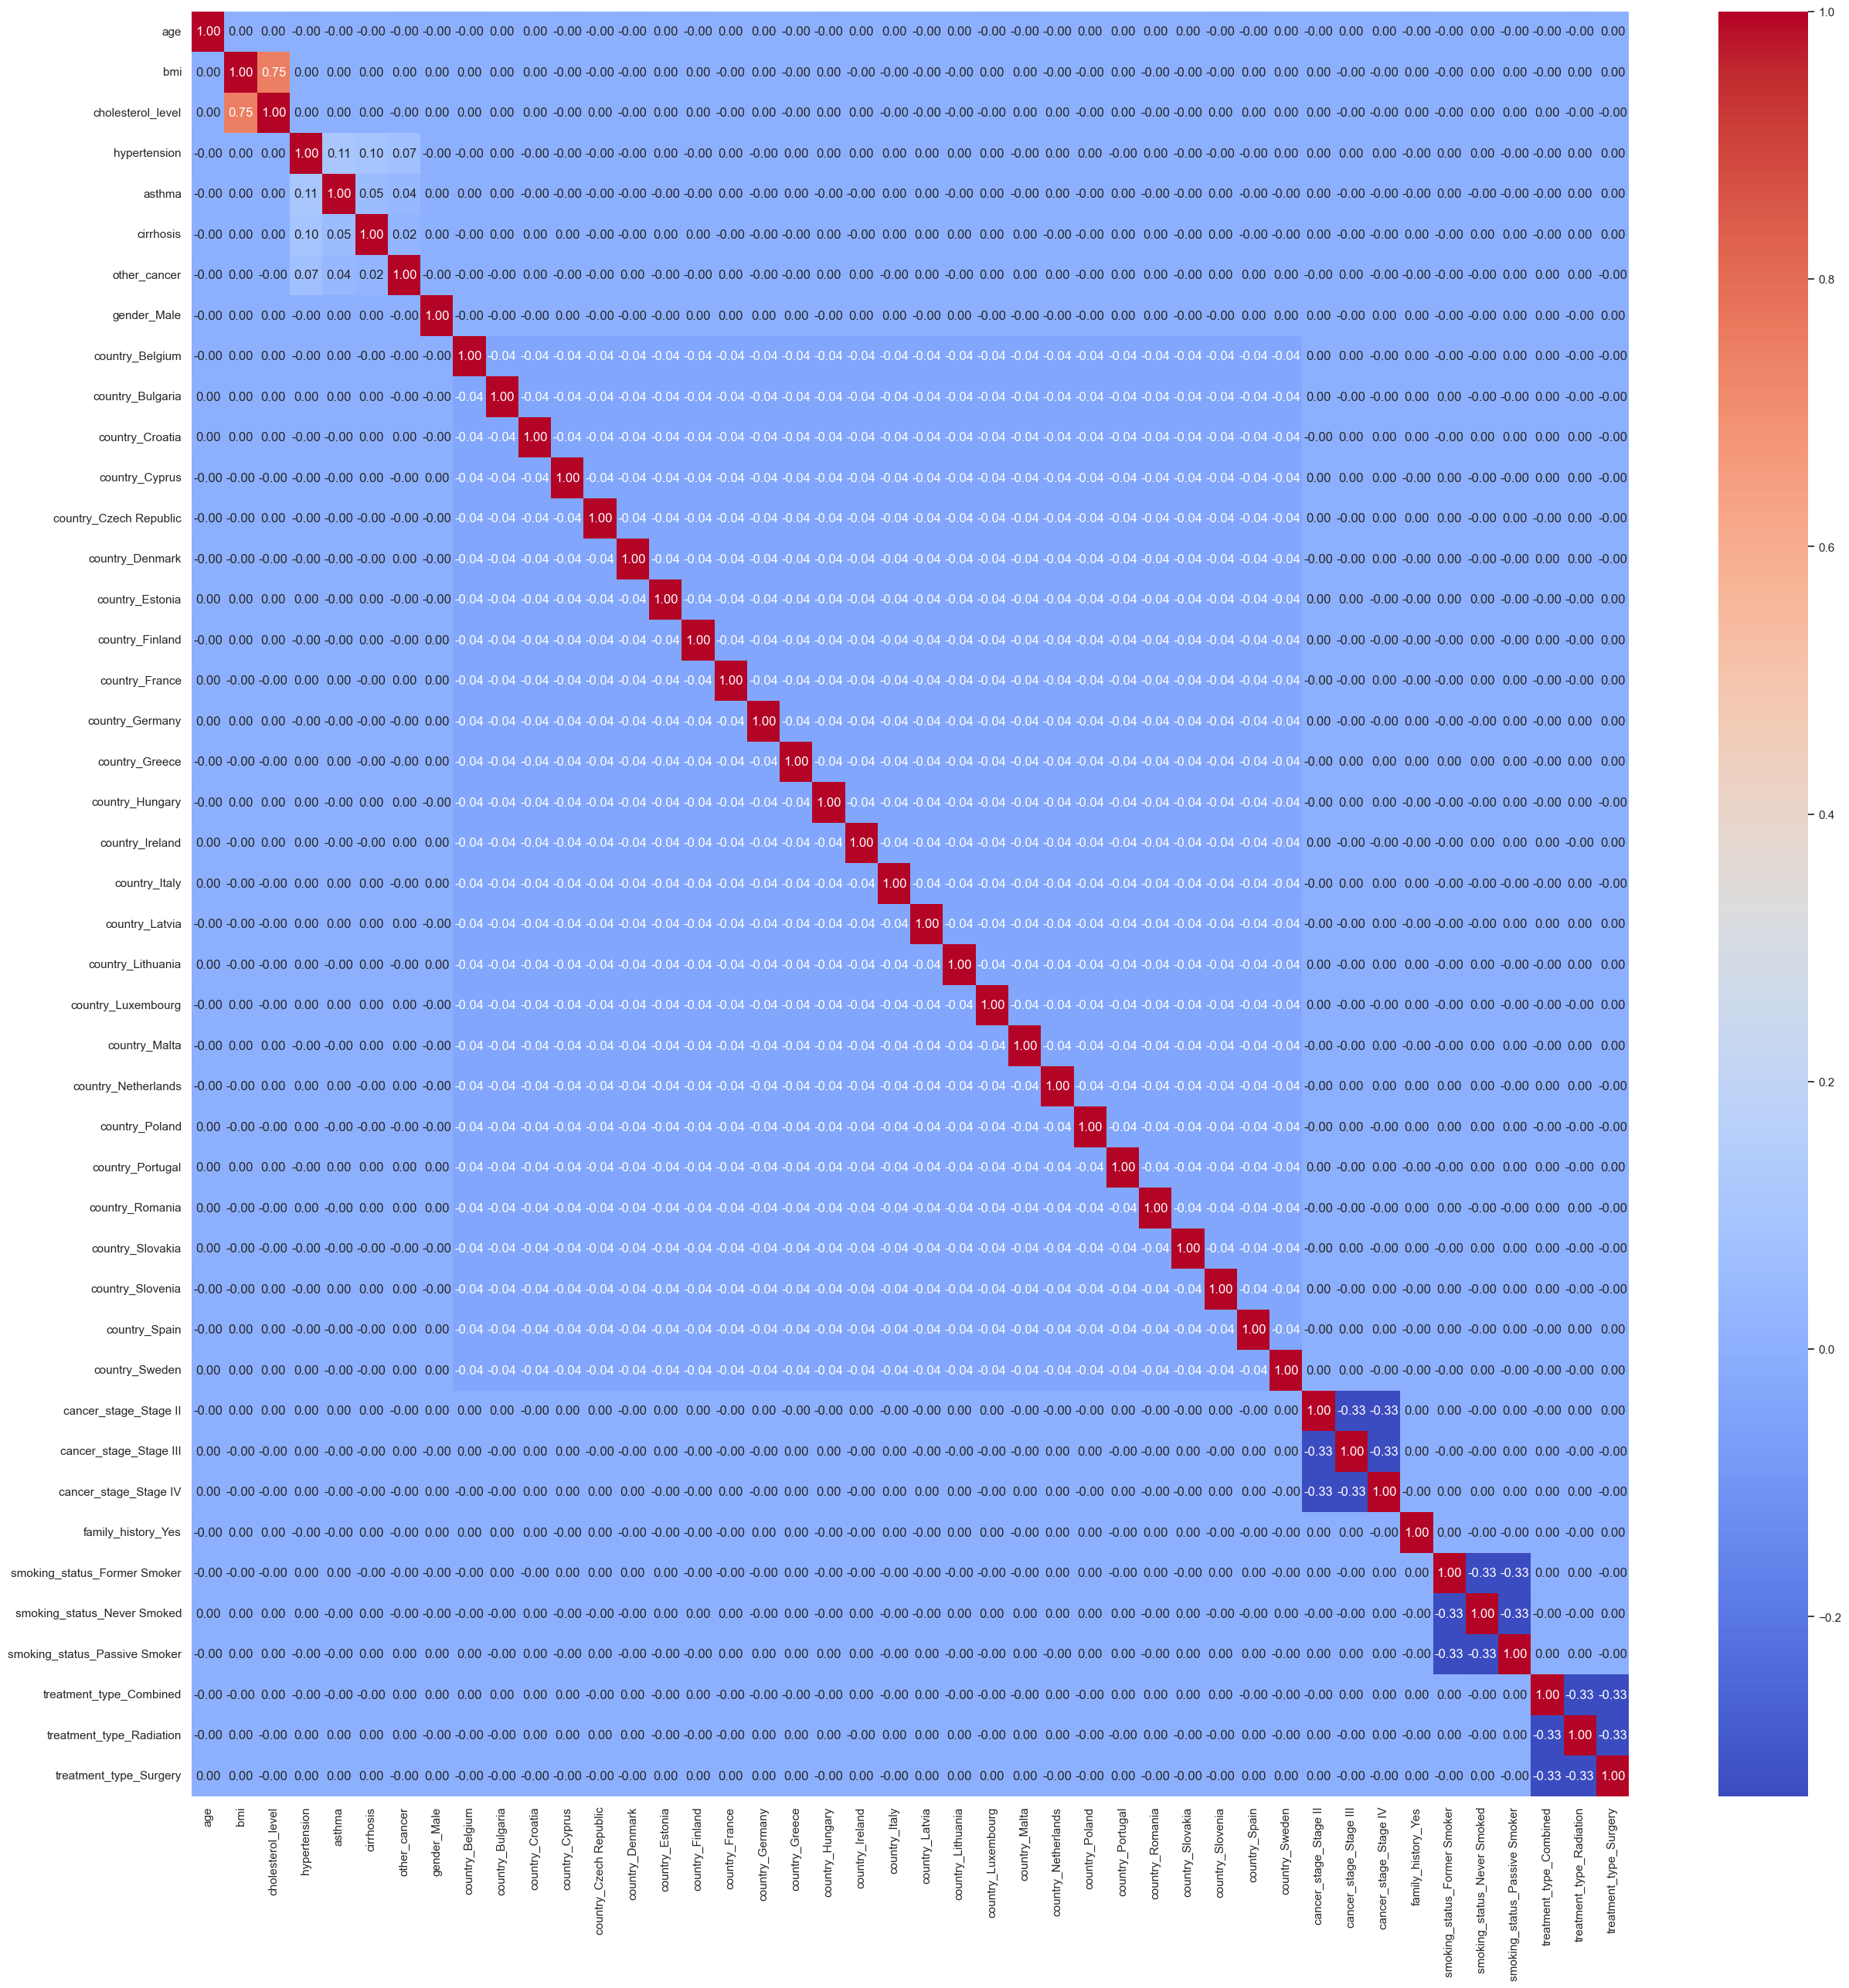

In [13]:
x = df_encoded.drop('survived', axis=1)

sns.set_theme(rc={"figure.figsize": (30, 30)})

sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [14]:
df= df_encoded

In [15]:
df

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,29.4,199,0,0,1,0,0,True,False,...,False,False,False,True,False,False,True,False,False,False
1,50.0,41.2,280,1,1,0,0,1,False,False,...,False,True,False,True,False,False,True,False,False,True
2,65.0,44.0,268,1,1,0,0,0,False,False,...,False,True,False,True,True,False,False,True,False,False
3,51.0,43.0,241,1,1,0,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
4,37.0,19.7,178,0,0,0,0,0,True,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,44.8,243,1,1,1,0,0,True,False,...,False,False,True,False,False,False,True,False,True,False
889996,62.0,21.6,240,0,0,0,0,0,False,False,...,True,False,False,True,True,False,False,False,False,True
889997,48.0,38.6,242,1,0,0,0,1,False,False,...,False,True,False,True,False,True,False,True,False,False
889998,67.0,18.6,194,1,1,0,0,0,False,False,...,False,False,True,True,True,False,False,False,False,False


In [16]:
df['gender_Male'].value_counts()

gender_Male
True     445134
False    444866
Name: count, dtype: int64

In [17]:
df['gender_Male'] = df['gender_Male'].astype(int)

In [18]:
df

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,29.4,199,0,0,1,0,0,1,False,...,False,False,False,True,False,False,True,False,False,False
1,50.0,41.2,280,1,1,0,0,1,0,False,...,False,True,False,True,False,False,True,False,False,True
2,65.0,44.0,268,1,1,0,0,0,0,False,...,False,True,False,True,True,False,False,True,False,False
3,51.0,43.0,241,1,1,0,0,0,0,True,...,False,False,False,False,False,False,True,False,False,False
4,37.0,19.7,178,0,0,0,0,0,1,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,44.8,243,1,1,1,0,0,1,False,...,False,False,True,False,False,False,True,False,True,False
889996,62.0,21.6,240,0,0,0,0,0,0,False,...,True,False,False,True,True,False,False,False,False,True
889997,48.0,38.6,242,1,0,0,0,1,0,False,...,False,True,False,True,False,True,False,True,False,False
889998,67.0,18.6,194,1,1,0,0,0,0,False,...,False,False,True,True,True,False,False,False,False,False


In [19]:
bool_cols = df.select_dtypes(include=bool).columns
print(bool_cols)

Index(['country_Belgium', 'country_Bulgaria', 'country_Croatia',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Hungary',
       'country_Ireland', 'country_Italy', 'country_Latvia',
       'country_Lithuania', 'country_Luxembourg', 'country_Malta',
       'country_Netherlands', 'country_Poland', 'country_Portugal',
       'country_Romania', 'country_Slovakia', 'country_Slovenia',
       'country_Spain', 'country_Sweden', 'cancer_stage_Stage II',
       'cancer_stage_Stage III', 'cancer_stage_Stage IV', 'family_history_Yes',
       'smoking_status_Former Smoker', 'smoking_status_Never Smoked',
       'smoking_status_Passive Smoker', 'treatment_type_Combined',
       'treatment_type_Radiation', 'treatment_type_Surgery'],
      dtype='object')


In [20]:
df[df.select_dtypes(include=bool).columns] = df.select_dtypes(include=bool).astype(int)


In [21]:
df

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,29.4,199,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,50.0,41.2,280,1,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
2,65.0,44.0,268,1,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
3,51.0,43.0,241,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,37.0,19.7,178,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,44.8,243,1,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
889996,62.0,21.6,240,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
889997,48.0,38.6,242,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
889998,67.0,18.6,194,1,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [22]:
# === IQR-based outlier detection and removal (no file saving) ===
import pandas as pd
import numpy as np
from collections import Counter

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def iqr_bounds(series, factor=1.5):
    """Return Tukey IQR lower and upper bounds."""
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    step = factor * iqr
    return q1 - step, q3 + step

def IQR_method(df, n=1, features=None, factor=1.5, verbose=True):
    """
    Detect rows that are outliers in more than `n` columns using the IQR method.
    Returns a list of indices and a per-feature summary.
    """
    if features is None:
        features = df.columns.tolist()
    
    outlier_flags = Counter()
    bounds = {}

    for col in features:
        s = df[col].astype(float)
        lower, upper = iqr_bounds(s, factor)
        idxs = s[(s < lower) | (s > upper)].index
        for i in idxs:
            outlier_flags[i] += 1
        bounds[col] = (lower, upper, len(idxs))

    multiple_outliers = [i for i, c in outlier_flags.items() if c > n]

    if verbose:
        print(f"Scanned {len(features)} features.")
        print(f"Rows with >{n} outlier flags: {len(multiple_outliers)}")

    return multiple_outliers, bounds

# --- Run outlier detection ---
n_threshold = 1  # rows that are outliers in >1 columns
idx_to_drop, bounds = IQR_method(df[numeric_cols], n=n_threshold)

# --- Remove outliers ---
print(f"Original shape: {df.shape}")
df_cleaned = df.drop(index=idx_to_drop).reset_index(drop=True)
print(f"Cleaned shape:  {df_cleaned.shape}")
print(f"Total dropped rows: {len(idx_to_drop)}")

# (Optional) Inspect the most affected columns
outlier_summary = pd.DataFrame(
    [(k,)+v for k,v in bounds.items()],
    columns=["feature","lower_bound","upper_bound","num_outliers_in_feature"]
).sort_values("num_outliers_in_feature", ascending=False)

outlier_summary.head(10)  


Scanned 45 features.
Rows with >1 outlier flags: 729968
Original shape: (890000, 45)
Cleaned shape:  (160032, 45)
Total dropped rows: 729968


,feature,lower_bound,upper_bound,num_outliers_in_feature
3,hypertension,1.0,1.0,222479
35,cancer_stage_Stage II,0.0,0.0,222363
39,smoking_status_Former Smoker,0.0,0.0,222181
43,treatment_type_Radiation,0.0,0.0,220868
5,cirrhosis,0.0,0.0,201101
7,survived,0.0,0.0,196004
6,other_cancer,0.0,0.0,78460
26,country_Malta,0.0,0.0,33367
21,country_Ireland,0.0,0.0,33243
29,country_Portugal,0.0,0.0,33208


In [23]:
df_cleaned

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,51.0,43.0,241,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,56.0,36.8,270,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,71.0,28.9,178,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,44.0,42.4,259,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,59.0,22.0,229,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160027,58.0,24.9,209,1,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
160028,56.0,37.7,274,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
160029,58.0,21.2,177,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
160030,43.0,27.6,239,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [24]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import joblib
x=df_cleaned.drop(columns=['survived','country_Belgium', 'country_Bulgaria', 'country_Croatia', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Estonia', 'country_Finland', 'country_France', 'country_Germany', 'country_Greece', 'country_Hungary', 'country_Ireland', 'country_Italy', 'country_Latvia', 'country_Lithuania', 'country_Luxembourg', 'country_Malta', 'country_Netherlands', 'country_Poland', 'country_Portugal', 'country_Romania', 'country_Slovakia', 'country_Slovenia', 'country_Spain', 'country_Sweden'])

y=df_cleaned['survived'] 

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)
joblib.dump(scaler, 'scaler1.pkl')


['scaler1.pkl']

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6a58025a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6a5802b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6a57d6ba0>,
 'medians': [<matplotlib.lines.Line2D at 0x1b6a5803110>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b6a5803410>,
 'means': []}

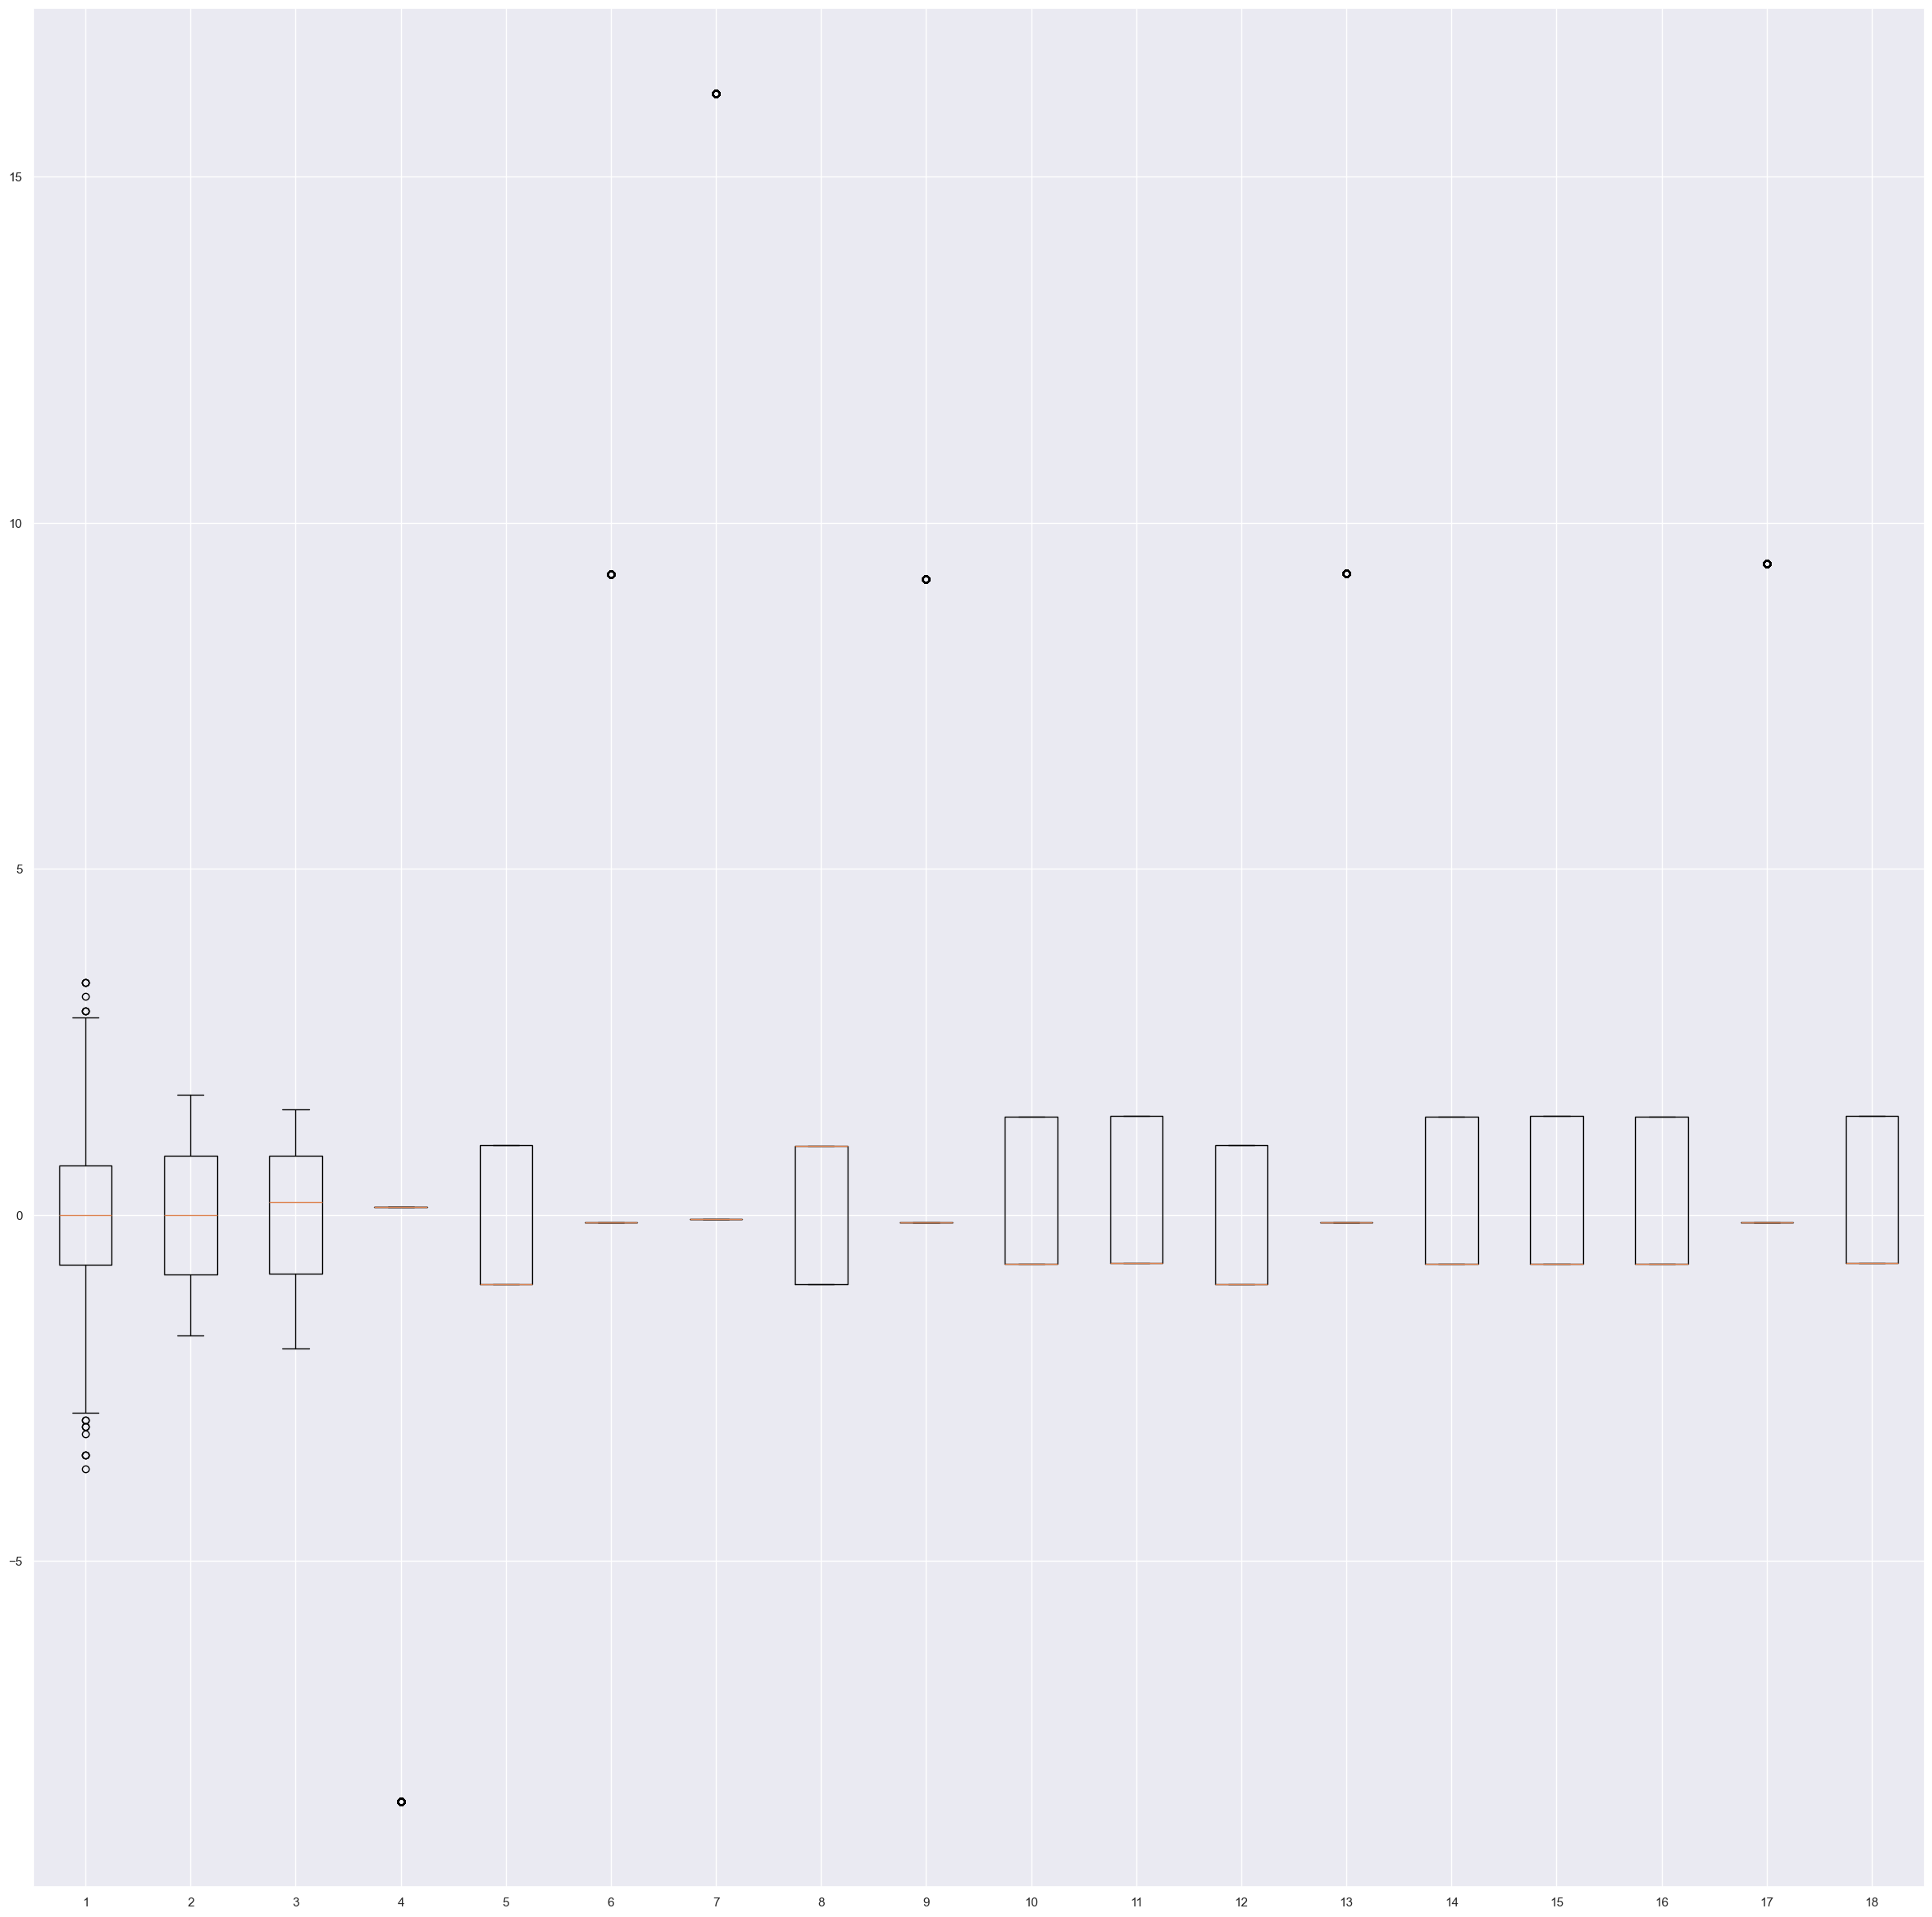

In [25]:
plt.boxplot(x)

TEST CSMUTE


In [26]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE

class SMUTE_Fast(BaseEstimator):
    def __init__(self, k=5, n_removals=0, batch_size=1024, refresh_every=2000, random_state=None):
        self.k = int(k); self.n_removals = int(n_removals)
        self.batch_size = int(batch_size); self.refresh_every = int(refresh_every)
        self.random_state = np.random.RandomState(random_state)

    def fit_resample(self, X, y):
        X = np.asarray(X, dtype=np.float32); y = np.asarray(y)
        classes, counts = np.unique(y, return_counts=True)
        if len(classes) != 2: raise ValueError("Binary labels required.")
        maj = classes[np.argmax(counts)]; min_ = classes[np.argmin(counts)]

        Xmaj = X[y == maj].copy(); Xmin = X[y == min_]
        alive = np.ones(len(Xmaj), dtype=bool)
        synth = []; steps = max(0, self.n_removals)
        if steps == 0 or len(Xmaj) < 2: return X.copy(), y.copy()

        # initial neighbors
        k_eff = max(1, min(self.k, len(Xmaj) - 1))
        nbrs = NearestNeighbors(n_neighbors=k_eff + 1).fit(Xmaj)

        done = 0
        while done < steps and alive.sum() > 2:
            if done % self.refresh_every == 0:
                k_eff = max(1, min(self.k, alive.sum() - 1))
                nbrs = NearestNeighbors(n_neighbors=k_eff + 1).fit(Xmaj[alive])

            b = min(self.batch_size, steps - done, max(1, alive.sum() // 200))
            alive_idx = np.flatnonzero(alive)
            anchors = self.random_state.choice(alive_idx, size=b, replace=False)

            compact = Xmaj[alive]
            # map anchors to compact positions
            pos = np.searchsorted(alive_idx, anchors)
            _, inds = nbrs.kneighbors(compact[pos])
            partner_pos = np.array([self.random_state.choice(row[1:]) for row in inds])
            partner_abs = alive_idx[partner_pos]

            r = self.random_state.rand(b, 1)
            x1 = Xmaj[anchors]; x2 = Xmaj[partner_abs]
            x0 = x1 + r * (x2 - x1)
            synth.append(x0)

            alive[anchors] = False; alive[partner_abs] = False
            done += b

        Xmaj_final = Xmaj[alive]
        if synth: Xmaj_final = np.vstack([Xmaj_final, np.vstack(synth)])
        X_res = np.vstack([Xmaj_final, Xmin])
        y_res = np.hstack([np.full(len(Xmaj_final), maj, dtype=y.dtype),
                           np.full(len(Xmin), min_, dtype=y.dtype)])
        return X_res, y_res


class CSMOUTE_Fast(BaseEstimator):
    def __init__(self, k_smote=5, k_smute=5, ratio=0.8, random_state=None,
                 smute_batch_size=1024, smute_refresh_every=2000):
        self.k_smote = int(k_smote); self.k_smute = int(k_smute)
        self.ratio = float(ratio); self.random_state = random_state
        self.smute_batch_size = smute_batch_size; self.smute_refresh_every = smute_refresh_every

    def fit_resample(self, X, y):
        X = np.asarray(X, dtype=np.float32); y = np.asarray(y)
        classes, counts = np.unique(y, return_counts=True)
        maj, min_ = classes[np.argmax(counts)], classes[np.argmin(counts)]
        n_gap = int(counts.max() - counts.min())
        if n_gap <= 0: return X.copy(), y.copy()

        n_smote = int(round(n_gap * self.ratio))
        n_smute = n_gap - n_smote

        # SMOTE minority + n_smote
        if n_smote > 0:
            min_count = (y == min_).sum()
            target_min = min_count + n_smote
            k_eff = max(1, min(self.k_smote, max(min_count - 1, 1)))
            sm = SMOTE(sampling_strategy={min_: target_min},
                       k_neighbors=k_eff, random_state=self.random_state)
            X1, y1 = sm.fit_resample(X, y)
        else:
            X1, y1 = X, y

        # SMUTE majority - n_smute (fast)
        if n_smute > 0:
            need_remove = max(0, (y1 == maj).sum() - (y1 == min_).sum())
            need_remove = min(need_remove, n_smute)
            smute = SMUTE_Fast(k=self.k_smute, n_removals=need_remove,
                               batch_size=self.smute_batch_size,
                               refresh_every=self.smute_refresh_every,
                               random_state=self.random_state)
            X2, y2 = smute.fit_resample(X1, y1)
        else:
            X2, y2 = X1, y1
        return X2, y2


In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import numpy as np

try:
    # Make sure these classes are the **fixed** versions.
    sampler = CSMOUTE_Fast(
        k_smote=5, k_smute=3, ratio=0.95,   # do most work via fast SMOTE
        random_state=42,
        smute_batch_size=2048, smute_refresh_every=5000
    )
    X_res, y_res = sampler.fit_resample(x, y)
except Exception as e:
    print("CSMOUTE_Fast failed, falling back to SMOTETomek. Error was:", repr(e))
    X_res, y_res = SMOTETomek(sampling_strategy=0.7, random_state=42).fit_resample(x, y)

print("Final class distribution:\n", np.unique(y_res, return_counts=True))



CSMOUTE_Fast failed, falling back to SMOTETomek. Error was: IndexError('index 156980 is out of bounds for axis 0 with size 156897')
Final class distribution:
 (array([0, 1]), array([157720, 110177]))


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set shape: {X_train.shape}, Class distribution: {y_train.value_counts()}")
print(f"Validation set shape: {X_val.shape}, Class distribution: {y_val.value_counts()}")
print(f"Test set shape: {X_test.shape}, Class distribution: {y_test.value_counts()}")

Training set shape: (187527, 18), Class distribution: survived
0    110403
1     77124
Name: count, dtype: int64
Validation set shape: (40185, 18), Class distribution: survived
0    23658
1    16527
Name: count, dtype: int64
Test set shape: (40185, 18), Class distribution: survived
0    23659
1    16526
Name: count, dtype: int64


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\ahmed\anaconda3\envs\open_manus\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 48,129 (188.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5881 - loss: 0.6549 - val_accuracy: 0.6105 - val_loss: 0.6420
Epoch 2/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6053 - loss: 0.6393 - val_accuracy: 0.6455 - val_loss: 0.6257
Epoch 3/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6280 - loss: 0.6245 - val_accuracy: 0.6688 - val_loss: 0.6063
Epoch 4/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6458 - loss: 0.6109 - val_accuracy: 0.6795 - val_loss: 0.5929
Epoch 5/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6581 - loss: 0.5986 - val_accuracy: 0.6920 - val_loss: 0.5783
Epoch 6/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6686 - loss: 0.5880 - val_accuracy: 0.6844 - val_loss: 0.5782
Epoch 7/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6780 - loss: 0.5789 - val_accuracy: 0.6953 - val_loss: 0.5652
Epoch 8/100
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6873 - loss: 0

In [31]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score
import numpy as np

p_val = model.predict(X_val).ravel()
prec, rec, thr = precision_recall_curve(y_val, p_val)

f1_scores = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1_scores)
best_thr = thr[best_idx]
print("Best threshold:", best_thr)
p_test = model.predict(X_test).ravel()
y_pred = (p_test >= best_thr).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("accuracy is: ",accuracy_score(y_test,y_pred))


1256/1256 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step
Best threshold: 0.6672763
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     23659
           1       0.79      0.95      0.87     16526

    accuracy                           0.88     40185
   macro avg       0.88      0.89      0.88     40185
weighted avg       0.89      0.88      0.88     40185

Confusion Matrix:
[[19577  4082]
 [  784 15742]]
accuracy is:  0.8789100410600971


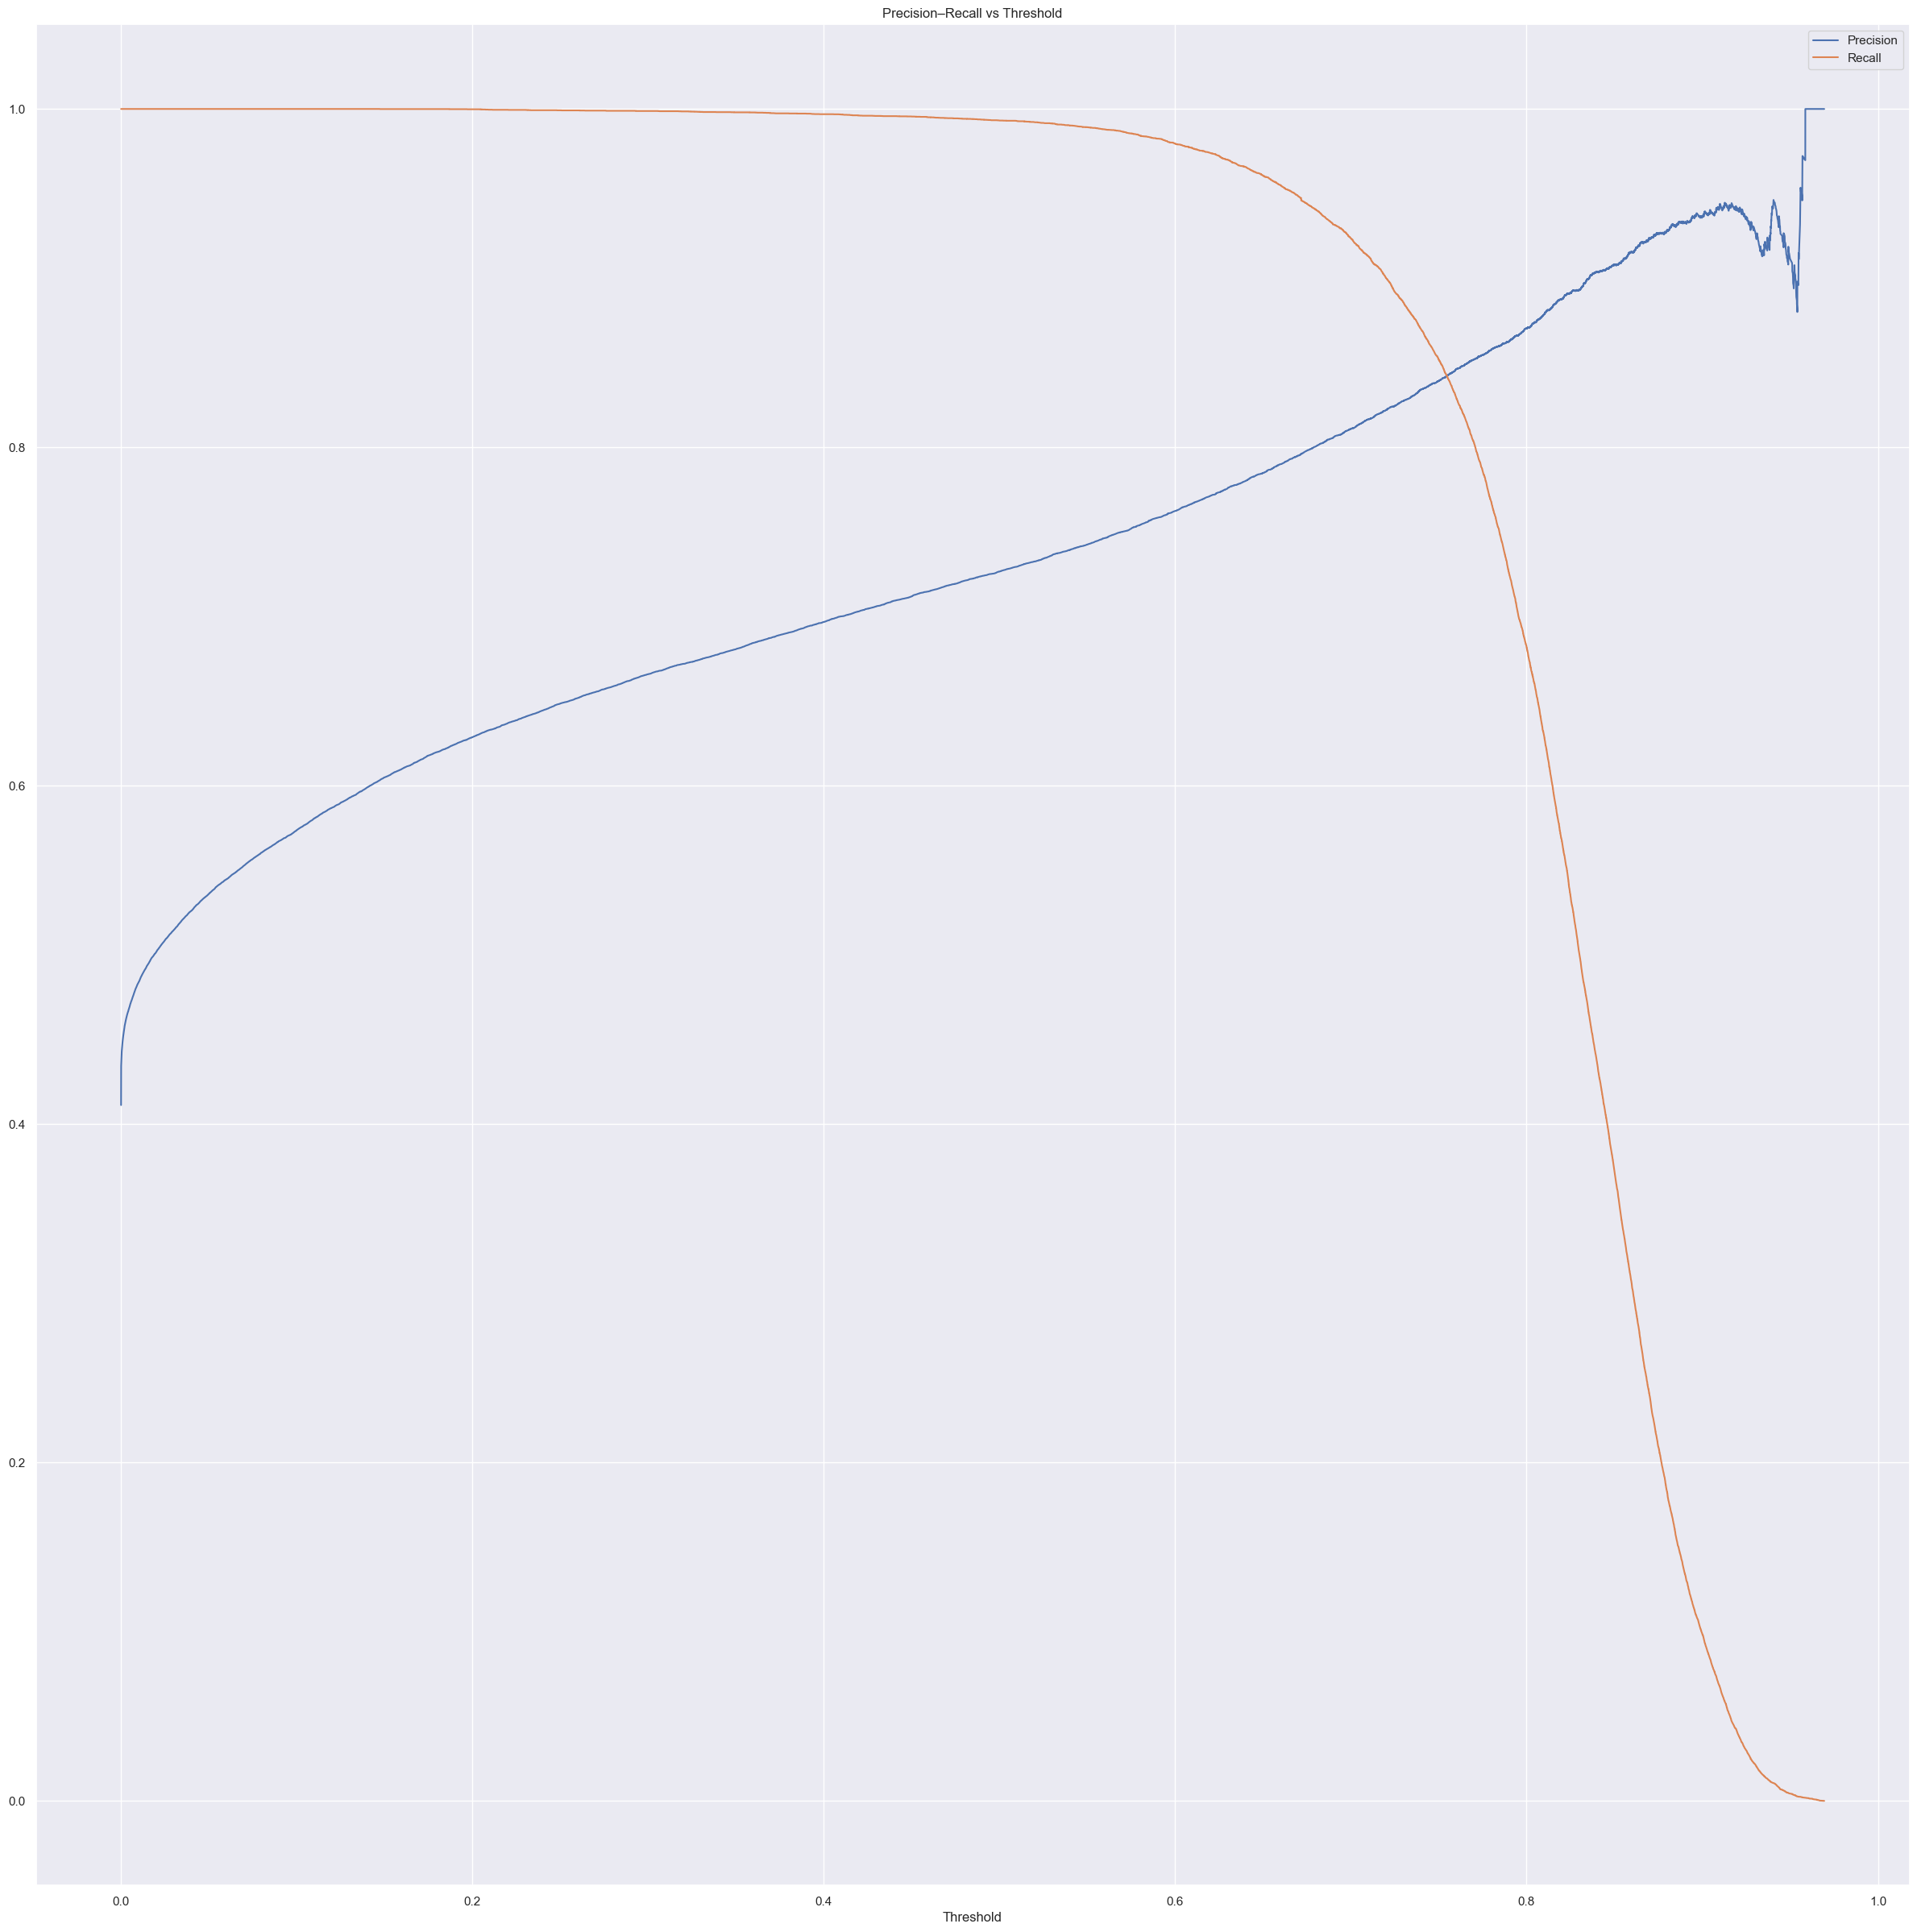

In [32]:
import matplotlib.pyplot as plt
plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision–Recall vs Threshold")
plt.show()


In [33]:
column_names = df.columns.tolist()
print(column_names)

['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived', 'gender_Male', 'country_Belgium', 'country_Bulgaria', 'country_Croatia', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Estonia', 'country_Finland', 'country_France', 'country_Germany', 'country_Greece', 'country_Hungary', 'country_Ireland', 'country_Italy', 'country_Latvia', 'country_Lithuania', 'country_Luxembourg', 'country_Malta', 'country_Netherlands', 'country_Poland', 'country_Portugal', 'country_Romania', 'country_Slovakia', 'country_Slovenia', 'country_Spain', 'country_Sweden', 'cancer_stage_Stage II', 'cancer_stage_Stage III', 'cancer_stage_Stage IV', 'family_history_Yes', 'smoking_status_Former Smoker', 'smoking_status_Never Smoked', 'smoking_status_Passive Smoker', 'treatment_type_Combined', 'treatment_type_Radiation', 'treatment_type_Surgery']


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160032 entries, 0 to 160031
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            160032 non-null  float64
 1   bmi                            160032 non-null  float64
 2   cholesterol_level              160032 non-null  float64
 3   hypertension                   160032 non-null  float64
 4   asthma                         160032 non-null  float64
 5   cirrhosis                      160032 non-null  float64
 6   other_cancer                   160032 non-null  float64
 7   gender_Male                    160032 non-null  float64
 8   cancer_stage_Stage II          160032 non-null  float64
 9   cancer_stage_Stage III         160032 non-null  float64
 10  cancer_stage_Stage IV          160032 non-null  float64
 11  family_history_Yes             160032 non-null  float64
 12  smoking_status_Former Smoker  

In [35]:
model.save('model1.h5')